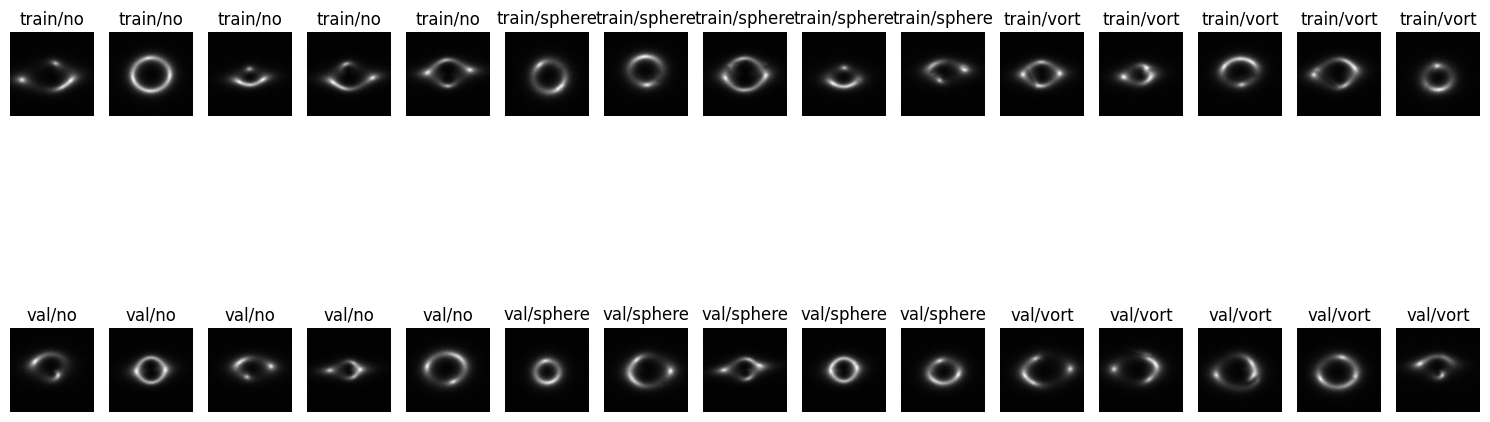

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Use raw string (r) to avoid escape issues on Windows
base_dir = r"C:\Project\Dataset\dataset"   # Add 'r' prefix

# Define the classes and their paths
classes = ['no', 'sphere', 'vort']
sets = ['train', 'val']

def load_and_visualize_images(base_dir, sets, classes, num_images=5):
    """Visualizes random images from the dataset."""
    
    fig, axes = plt.subplots(len(sets), len(classes) * num_images, figsize=(15, 8))

    for i, dataset in enumerate(sets):
        for j, cls in enumerate(classes):
            cls_path = os.path.join(base_dir, dataset, cls)
            
            if not os.path.exists(cls_path):
                print(f"Path not found: {cls_path}")
                continue

            image_files = [f for f in os.listdir(cls_path) if f.endswith('.npy')]

            random_images = random.sample(image_files, min(num_images, len(image_files)))

            for k, img_file in enumerate(random_images):
                img_path = os.path.join(cls_path, img_file)
                img = np.load(img_path)

                # Reshape the image properly for display
                if img.ndim == 3 and img.shape[0] == 1:
                    img = img.squeeze()  # Remove the extra channel dimension

                # Plotting
                ax = axes[i, j * num_images + k]
                ax.imshow(img, cmap='gray')
                ax.set_title(f"{dataset}/{cls}")
                ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize 5 random images per class from train and val sets
load_and_visualize_images(base_dir, sets, classes)


In [8]:
import tensorflow as tf
print(tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices('GPU'))


2.15.0
Built with CUDA: False
GPUs: []


In [7]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.15.0
Built with CUDA: False
GPUs: []
